In [313]:
import os
from os.path import join
import pandas as pd
import numpy as np
import joblib

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer

# Raw Data

In [94]:
red_wine = os.path.join('data','wine', 'winequality-red.csv')
white_wine = os.path.join('data','wine', 'winequality-white.csv')
turbine = os.path.join('data','turbine','gt_2011.csv')
mushrooms = os.path.join('data','mushroom','secondary_data.csv')

# encoders to use
scale = StandardScaler()
ohe = OneHotEncoder(sparse_output=False)

In [95]:
transformer = make_column_transformer(
    (
        ohe, 
        [
        'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment','gill-spacing', 'gill-color', 
       'stem-root', 'stem-surface', 'stem-color','veil-type', 'veil-color',
        'has-ring', 'ring-type', 'spore-print-color','habitat', 'season'
        ]
        ),
    remainder='passthrough'
    )

# pre-process shroom data

shroom_df = pd.read_csv(mushrooms,sep=';').sample(frac=1).reset_index(drop=True)
x = shroom_df.iloc[:,1:].copy()
x_shroom = pd.DataFrame(transformer.fit_transform(x), 
                columns=transformer.get_feature_names_out())
y = shroom_df.iloc[:,0].copy()
y_shroom = (y == 'p')


# reduce the number of training examples
x_shroom = x_shroom[:7000]
y_shroom =  y_shroom[:7000]

# Scale numerical attributes to be b/w 1 and -1
lst_of_num_cols = [
    'remainder__cap-diameter', 'remainder__stem-height', 'remainder__stem-width'
    ]
x_shroom[lst_of_num_cols] = scale.fit_transform(x_shroom[lst_of_num_cols])

In [96]:
white_df = pd.read_csv(white_wine, sep=';')
red_df = pd.read_csv(red_wine, sep=';')
white_df['type'] = 0
red_df['type'] = 1
wine_df = pd.concat([white_df,red_df])
wine_df = wine_df.sample(frac=1).reset_index(drop=True)

# set x and y values
# remove 'quality' and 'type' column from x array
x_wine = wine_df.iloc[:,:-2].copy()
# scale x vals
x_wine.values[:,:] = scale.fit_transform(x_wine)
# set y array equal to 'type' column 
y_wine = wine_df.iloc[:,-1].copy()

In [4]:
DATA_FOLDER = join('algo_data') 

# Helper Functions

In [168]:
def plot_curve(x_data, y_mean, y_std, axs=None,
                take_mean=True, name='', x_name='num_clusters'):
    axs.set_title(name, fontsize=20)
    axs.tick_params(axis='both', labelsize=20)
    axs.set_xlabel(x_name, fontsize=20)

    if axs == None:
        _, axs = plt.subplots()

    if take_mean:
        axs.plot(x_data,y_mean,'o-')
        line = axs.fill_between(x_data, y_mean + y_std, y_mean - y_std,alpha=0.3)
    else:
        line = axs.plot(x_data, y_mean)

    return line

In [176]:
def plot_bic_curve(x_data, y_mean, y_std, axs=None,
                    take_mean=True, name='', x_name='num_clusters',
                      selected_compoents=1):
    
    axs.set_title(name, fontsize=20)
    axs.tick_params(axis='both', labelsize=20)
    axs.set_xlabel(x_name, fontsize=20)

    if axs == None:
        _, axs = plt.subplots()

    if take_mean:
        line = axs.errorbar(x=x_data,y=y_mean, yerr=y_std, fmt='o')
    else:
        line = axs.scatter(x_data, y_mean)

    # axs.

    return line

In [282]:
def plot_rca_curve(x_data, y_mean, y_std=None, axs=None,
                take_mean=True, name='', x_name='num_components', 
                selected_components=1):
    
    axs.set_title(name,fontsize=20)
    axs.tick_params(axis='both', labelsize=20)
    axs.set_xlabel(x_name,fontsize=20)

    if axs == None:
        _, axs = plt.subplots()

    if take_mean:
        axs.plot(x_data,y_mean,'o-', label=name)
        line = axs.fill_between(x_data, y_mean + y_std, y_mean - y_std,alpha=0.3)
    else:
        line = axs.plot(x_data, y_mean, label=name)
    
    axs.axvline(selected_components, linestyle=':',
                c='orange', label=f'{selected_components} chosen\ncomponents',lw=3)
    axs.legend(fontsize=15)

    return line

In [356]:
def plot_dr_clust_curve(x_data, y_mean, y_std, axs=None,
                take_mean=True, name='', x_name='num_clusters',
                selected_components=1, label='KM'):
    axs.set_title(name, fontsize=20)
    axs.tick_params(axis='both', labelsize=20)
    axs.set_xlabel(x_name, fontsize=20)

    if axs == None:
        _, axs = plt.subplots()

    if take_mean:
        axs.plot(x_data,y_mean,'o-')
        line = axs.fill_between(x_data, y_mean + y_std, y_mean - y_std,alpha=0.3)
    else:
        line = axs.plot(x_data, y_mean)

    # axs.axvline(x=selected_components, color='orange',
    #                     linestyle=':', label=label, lw=3)

    return line

# Read in Data

## Clustering Results

In [15]:
## read wine results
df_km_wine = pd.read_csv(join(DATA_FOLDER,'df_km_wine.csv'))
s_km_cluster_wine= pd.read_csv(join(DATA_FOLDER,'s_km_cluster_wine.csv'))
x_km_wine= pd.read_csv(join(DATA_FOLDER,'x_km_wine.csv'))

df_em_wine= pd.read_csv(join(DATA_FOLDER,'df_em_wine.csv'))
df_em_score_wine= pd.read_csv(join(DATA_FOLDER,'df_em_score_wine.csv'))
s_em_cluster_wine= pd.read_csv(join(DATA_FOLDER,'s_em_cluster_wine.csv'))
x_em_wine= pd.read_csv(join(DATA_FOLDER,'x_em_wine.csv'))

In [16]:
## read shroom results

df_km_shroom = pd.read_csv(join(DATA_FOLDER,'df_km_shroom.csv'))
s_km_cluster_shroom= pd.read_csv(join(DATA_FOLDER,'s_km_cluster_shroom.csv'))
x_km_shroom= pd.read_csv(join(DATA_FOLDER,'x_km_shroom.csv'))

df_em_shroom= pd.read_csv(join(DATA_FOLDER,'df_em_shroom.csv'))
df_em_score_shroom= pd.read_csv(join(DATA_FOLDER,'df_em_score_shroom.csv'))
s_em_cluster_shroom= pd.read_csv(join(DATA_FOLDER,'s_em_cluster_shroom.csv'))
x_em_shroom= pd.read_csv(join(DATA_FOLDER,'x_em_shroom.csv'))

## Dimension Reduction Results

In [375]:
# dimension reduced wine dataset
df_pca_wine= pd.read_csv(join(DATA_FOLDER,'df_pca_wine.csv'))
s_pca_cluster_wine= pd.read_csv(join(DATA_FOLDER,'s_pca_cluster_wine.csv'))
x_pca_wine= pd.read_csv(join(DATA_FOLDER,'x_pca_wine.csv'))

df_rca_wine= pd.read_csv(join(DATA_FOLDER,'df_rca_wine.csv'))
s_rca_cluster_wine= pd.read_csv(join(DATA_FOLDER,'s_rca_cluster_wine.csv'))
x_rca_wine= pd.read_csv(join(DATA_FOLDER,'x_rca_wine.csv'))

df_man_wine= pd.read_csv(join(DATA_FOLDER,'df_man_wine.csv'))
s_man_cluster_wine= pd.read_csv(join(DATA_FOLDER,'s_man_cluster_wine.csv'))
x_man_wine= pd.read_csv(join(DATA_FOLDER,'x_man_wine.csv'))

df_ica_wine= pd.read_csv(join(DATA_FOLDER,'df_ica_wine.csv'))
s_ica_cluster_wine= pd.read_csv(join(DATA_FOLDER,'s_ica_cluster_wine.csv'))
x_ica_wine= pd.read_csv(join(DATA_FOLDER,'x_ica_wine.csv'))

In [376]:
# dimension reduced shroom dataset
df_pca_shroom= pd.read_csv(join(DATA_FOLDER,'df_pca_shroom.csv'))
s_pca_cluster_shroom= pd.read_csv(join(DATA_FOLDER,'s_pca_cluster_shroom.csv'))
x_pca_shroom= pd.read_csv(join(DATA_FOLDER,'x_pca_shroom.csv'))

df_rca_shroom= pd.read_csv(join(DATA_FOLDER,'df_rca_shroom.csv'))
s_rca_cluster_shroom= pd.read_csv(join(DATA_FOLDER,'s_rca_cluster_shroom.csv'))
x_rca_shroom= pd.read_csv(join(DATA_FOLDER,'x_rca_shroom.csv'))

df_man_shroom= pd.read_csv(join(DATA_FOLDER,'df_man_shroom.csv'))
s_man_cluster_shroom= pd.read_csv(join(DATA_FOLDER,'s_man_cluster_shroom.csv'))
x_man_shroom= pd.read_csv(join(DATA_FOLDER,'x_man_shroom.csv'))

df_ica_shroom= pd.read_csv(join(DATA_FOLDER,'df_ica_shroom.csv'))
s_ica_cluster_shroom= pd.read_csv(join(DATA_FOLDER,'s_ica_cluster_shroom.csv'))
x_ica_shroom= pd.read_csv(join(DATA_FOLDER,'x_ica_shroom.csv'))

## Clustering on DRed datasets

In [19]:
## read in clustering on dimension reduced wine set
df_km_pca_wine= pd.read_csv(join(DATA_FOLDER,'df_km_pca_wine.csv'))
s_km_pca_cluster_wine= pd.read_csv(join(DATA_FOLDER,'s_km_pca_cluster_wine.csv'))
x_km_pca_wine= pd.read_csv(join(DATA_FOLDER,'x_km_pca_wine.csv'))

df_em_pca_wine= pd.read_csv(join(DATA_FOLDER,'df_em_pca_wine.csv'))
df_em_score_pca_wine= pd.read_csv(join(DATA_FOLDER,'df_em_score_pca_wine.csv'))
s_em_cluster_pca_wine= pd.read_csv(join(DATA_FOLDER,'s_em_cluster_pca_wine.csv'))
x_em_pca_wine= pd.read_csv(join(DATA_FOLDER,'x_em_pca_wine.csv'))

df_km_rca_wine= pd.read_csv(join(DATA_FOLDER,'df_km_rca_wine.csv'))
s_km_rca_cluster_wine= pd.read_csv(join(DATA_FOLDER,'df_km_rca_wine.csv'))
x_km_rca_wine= pd.read_csv(join(DATA_FOLDER,'df_km_rca_wine.csv'))

df_em_rca_wine= pd.read_csv(join(DATA_FOLDER,'df_em_rca_wine.csv'))
df_em_score_rca_wine= pd.read_csv(join(DATA_FOLDER,'df_em_score_rca_wine.csv'))
s_em_cluster_rca_wine= pd.read_csv(join(DATA_FOLDER,'s_em_cluster_rca_wine.csv')) 
x_em_rca_wine= pd.read_csv(join(DATA_FOLDER,'x_em_rca_wine.csv'))

df_km_man_wine= pd.read_csv(join(DATA_FOLDER,'df_km_man_wine.csv'))
s_km_man_cluster_wine= pd.read_csv(join(DATA_FOLDER,'s_km_man_cluster_wine.csv'))
x_km_man_wine= pd.read_csv(join(DATA_FOLDER,'df_km_man_wine.csv'))

df_em_man_wine= pd.read_csv(join(DATA_FOLDER,'df_km_man_wine.csv'))
df_em_score_man_wine= pd.read_csv(join(DATA_FOLDER,'df_em_score_man_wine.csv'))
s_em_cluster_man_wine= pd.read_csv(join(DATA_FOLDER,'s_em_cluster_man_wine.csv'))
x_em_man_wine= pd.read_csv(join(DATA_FOLDER,'x_em_man_wine.csv'))

In [20]:
## read in clustering on dimension reduced wine set
df_km_pca_shroom= pd.read_csv(join(DATA_FOLDER,'df_km_pca_shroom.csv'))
s_km_pca_cluster_shroom= pd.read_csv(join(DATA_FOLDER,'s_km_pca_cluster_shroom.csv'))
x_km_pca_shroom= pd.read_csv(join(DATA_FOLDER,'x_km_pca_shroom.csv'))

df_em_pca_shroom= pd.read_csv(join(DATA_FOLDER,'df_em_pca_shroom.csv'))
df_em_score_pca_shroom= pd.read_csv(join(DATA_FOLDER,'df_em_score_pca_shroom.csv'))
s_em_cluster_pca_shroom= pd.read_csv(join(DATA_FOLDER,'s_em_cluster_pca_shroom.csv'))
x_em_pca_shroom= pd.read_csv(join(DATA_FOLDER,'x_em_pca_shroom.csv'))

df_km_rca_shroom= pd.read_csv(join(DATA_FOLDER,'df_km_rca_shroom.csv'))
s_km_rca_cluster_shroom= pd.read_csv(join(DATA_FOLDER,'df_km_rca_shroom.csv'))
x_km_rca_shroom= pd.read_csv(join(DATA_FOLDER,'df_km_rca_shroom.csv'))

df_em_rca_shroom= pd.read_csv(join(DATA_FOLDER,'df_em_rca_shroom.csv'))
df_em_score_rca_shroom= pd.read_csv(join(DATA_FOLDER,'df_em_score_rca_shroom.csv'))
s_em_cluster_rca_shroom= pd.read_csv(join(DATA_FOLDER,'s_em_cluster_rca_shroom.csv')) 
x_em_rca_shroom= pd.read_csv(join(DATA_FOLDER,'x_em_rca_shroom.csv'))

df_km_man_shroom= pd.read_csv(join(DATA_FOLDER,'df_km_man_shroom.csv'))
s_km_man_cluster_shroom= pd.read_csv(join(DATA_FOLDER,'s_km_man_cluster_shroom.csv'))
x_km_man_shroom= pd.read_csv(join(DATA_FOLDER,'df_km_man_shroom.csv'))

df_em_man_shroom= pd.read_csv(join(DATA_FOLDER,'df_km_man_shroom.csv'))
df_em_score_man_shroom= pd.read_csv(join(DATA_FOLDER,'df_em_score_man_shroom.csv'))
s_em_cluster_man_shroom= pd.read_csv(join(DATA_FOLDER,'s_em_cluster_man_shroom.csv'))
x_em_man_shroom= pd.read_csv(join(DATA_FOLDER,'x_em_man_shroom.csv'))

## Read in Neural Net Results

In [316]:
grid_km_wine = joblib.load('grid_km_wine.pkl')
grid_em_wine = joblib.load('grid_em_wine.pkl')
grid_km_shroom = joblib.load('grid_km_shroom.pkl')
grid_em_shroom = joblib.load('grid_em_wine.pkl')

grid_pca_wine = joblib.load('grid_pca_wine.pkl')
grid_rca_wine = joblib.load('grid_rca_wine.pkl')
grid_man_wine = joblib.load('grid_man_wine.pkl')

grid_pca_shroom = joblib.load('grid_pca_shroom.pkl')
grid_rca_shroom = joblib.load('grid_rca_shroom.pkl')
grid_man_shroom = joblib.load('grid_man_shroom.pkl')

# Visualizations

## Clustering on Raw Data

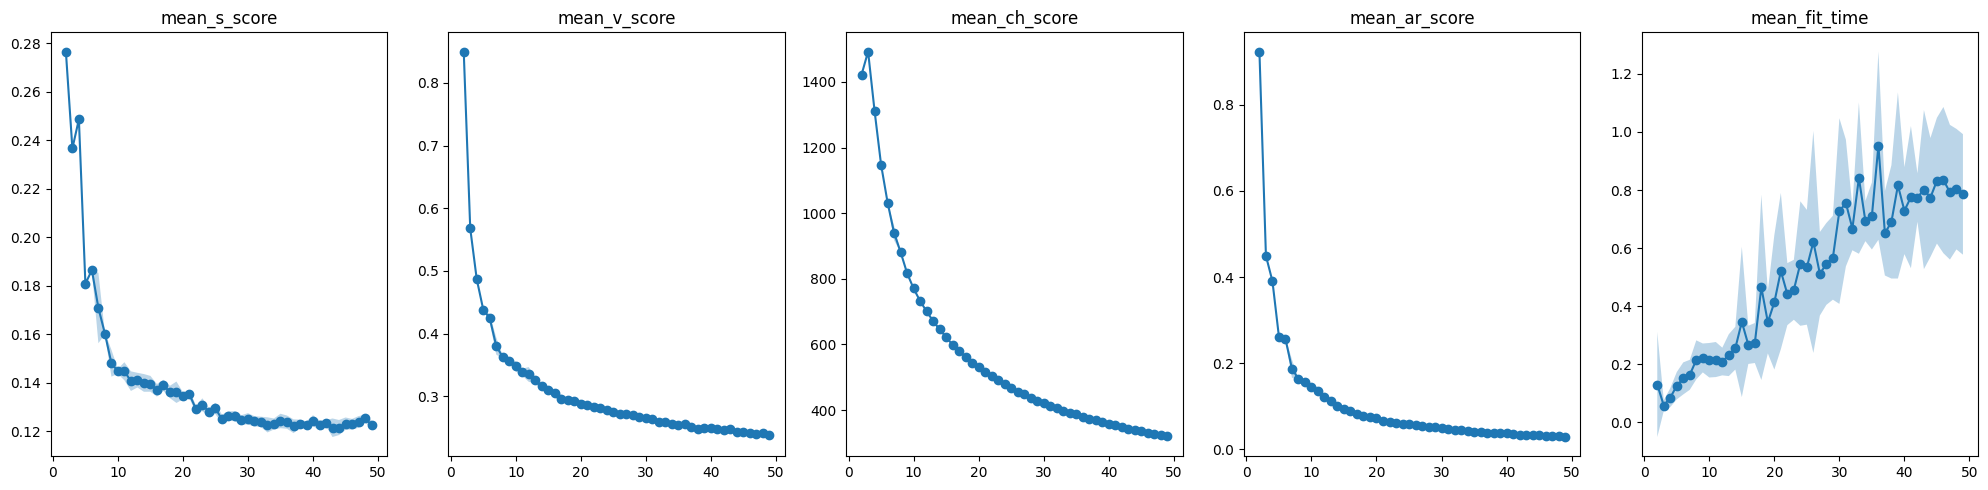

In [41]:
## K Means Clustering Results
fig, axs = plt.subplots(nrows=1,ncols=5, figsize=(20,5))
axs = axs.flatten()
score_lst = ['s', 'v', 'ch', 'ar']
x_data = df_km_wine['num_clusters']
count = 0
for name in score_lst:
    col_name = f'mean_{name}_score'
    std_name = f'std_{name}_score'
    y_mean = df_km_wine[col_name]
    y_std = df_km_wine[std_name]
    plot_curve(x_data=x_data, y_mean=y_mean, y_std=y_std, axs=axs[count], name=col_name)
    count=count+1

y_mean = df_km_wine['mean_fit_time']
y_std = df_km_wine['std_fit_time']
plot_curve(x_data=x_data, y_mean=y_mean, y_std=y_std, axs=axs[-1], name='mean_fit_time')
plt.tight_layout()
plt.show()

In [43]:
df_em_score_wine.columns.unique()

Index(['Unnamed: 0', 'num_clusters', 'mean_fit_time', 'std_fit_time',
       'mean_s_score', 'std_s_score', 'mean_v_score', 'std_v_score',
       'mean_ch_score', 'std_ch_score', 'mean_ar_score', 'std_ar_score'],
      dtype='object')

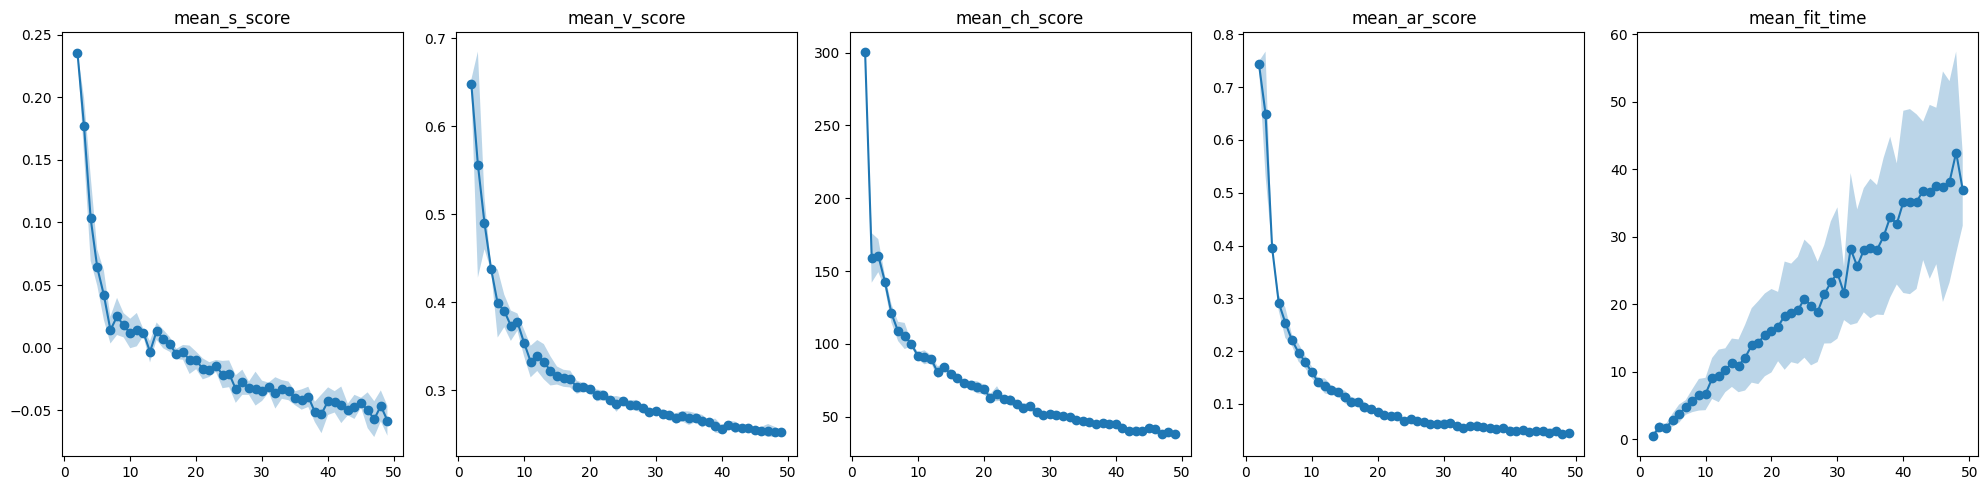

In [44]:
## EM Clustering Results
fig, axs = plt.subplots(nrows=1,ncols=5, figsize=(20,5))
axs = axs.flatten()
score_lst = ['s', 'v', 'ch', 'ar']
x_data = df_em_score_wine['num_clusters']
count = 0
for name in score_lst:
    col_name = f'mean_{name}_score'
    std_name = f'std_{name}_score'
    y_mean = df_em_score_wine[col_name]
    y_std = df_em_score_wine[std_name]
    plot_curve(x_data=x_data, y_mean=y_mean, y_std=y_std, axs=axs[count], name=col_name)
    count=count+1

y_mean = df_em_score_wine['mean_fit_time']
y_std = df_em_score_wine['std_fit_time']
plot_curve(x_data=x_data, y_mean=y_mean, y_std=y_std, axs=axs[-1], name='mean_fit_time')
plt.tight_layout()
plt.show()

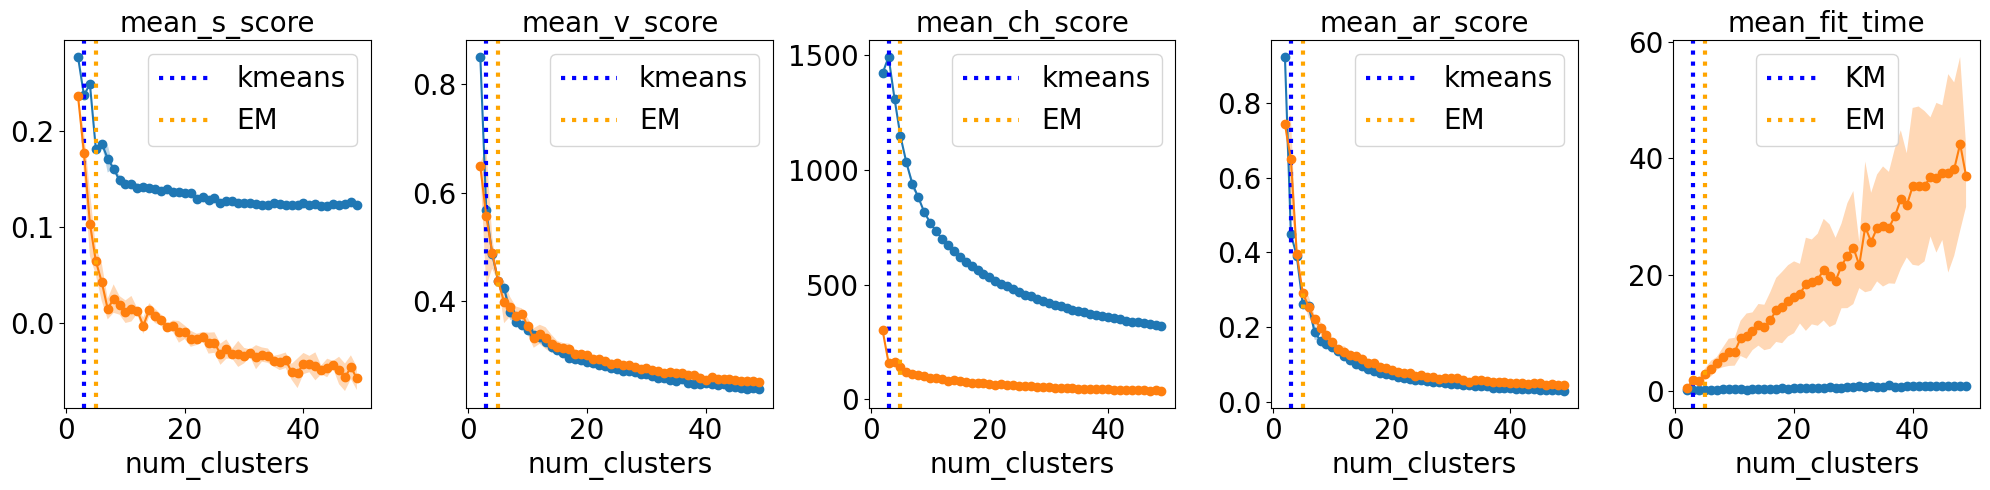

In [171]:
## K Means Clustering Results
fig, axs = plt.subplots(nrows=1,ncols=5, figsize=(20,5))
axs = axs.flatten()
score_lst = ['s', 'v', 'ch', 'ar']
x_data = df_km_wine['num_clusters']
count = 0
for name in score_lst:
    col_name = f'mean_{name}_score'
    std_name = f'std_{name}_score'

    # kmeans plot
    y_mean = df_km_wine[col_name]
    y_std = df_km_wine[std_name]
    plot_curve(x_data=x_data, y_mean=y_mean, y_std=y_std, axs=axs[count], name=col_name)
    axs[count].axvline(x=s_km_cluster_wine.iloc[0,1], color='blue',
                        linestyle=':', label='kmeans', lw=3)

    # EM plot
    y_mean = df_em_score_wine[col_name]
    y_std = df_em_score_wine[std_name]
    plot_curve(x_data=x_data, y_mean=y_mean, y_std=y_std, axs=axs[count], name=col_name)
    axs[count].axvline(x=s_em_cluster_wine.iloc[0,1],color='orange',
                        linestyle=':', label='EM', lw=3)
    axs[count].legend(fontsize=20)
    # increment index counter for axes array
    count=count+1

# plot fit time for km
y_mean = df_km_wine['mean_fit_time']
y_std = df_km_wine['std_fit_time']
plot_curve(x_data=x_data, y_mean=y_mean, y_std=y_std, axs=axs[-1], name='mean_fit_time')
axs[-1].axvline(x=s_km_cluster_wine.iloc[0,1],color='blue',
                        linestyle=':', label='KM', lw=3)

# plot fit time for em
y_mean = df_em_score_wine['mean_fit_time']
y_std = df_em_score_wine['std_fit_time']
plot_curve(x_data=x_data, y_mean=y_mean, y_std=y_std, axs=axs[-1], name='mean_fit_time')
axs[-1].axvline(x=s_em_cluster_wine.iloc[0,1],color='orange',
                        linestyle=':', label='EM', lw=3)
axs[-1].legend(fontsize=20)

# tighten layer for figure clarity
plt.tight_layout()
plt.show()

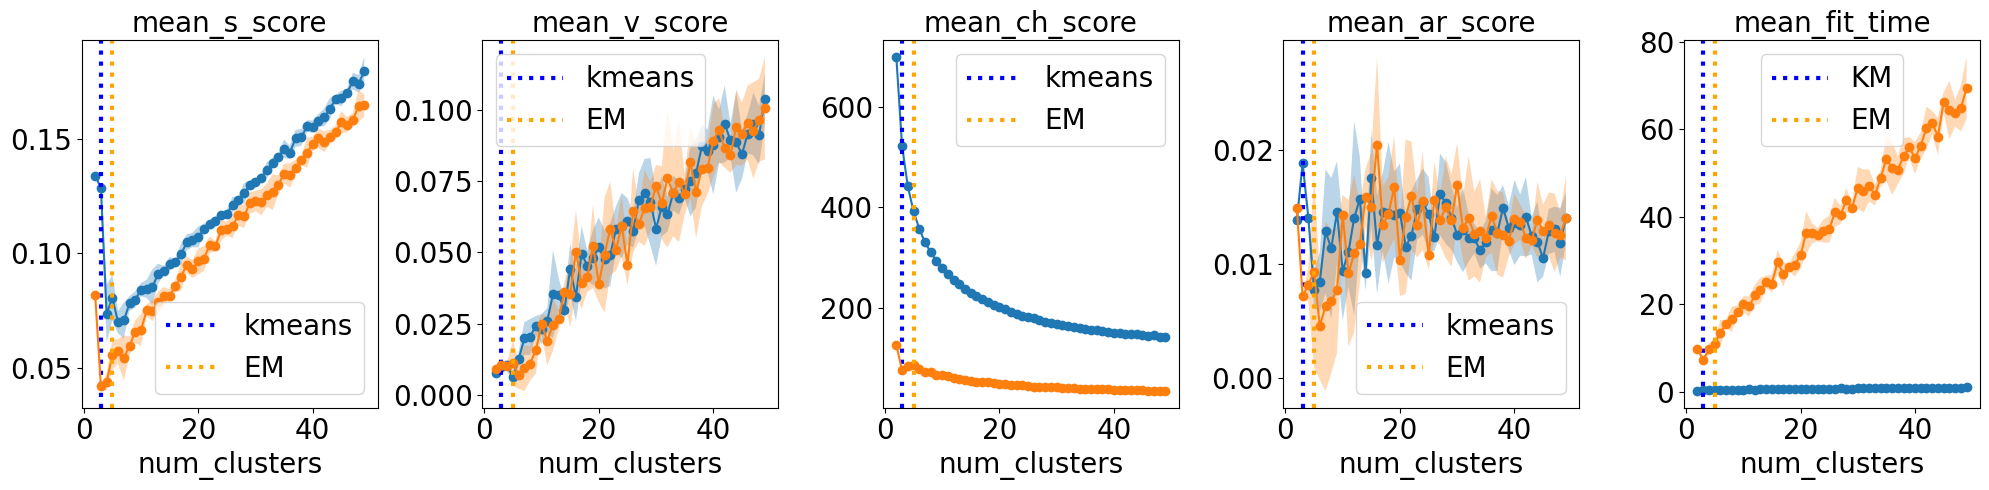

In [170]:
## Clustering Results for Shroom
fig, axs = plt.subplots(nrows=1,ncols=5, figsize=(20,5))
axs = axs.flatten()
score_lst = ['s', 'v', 'ch', 'ar']
x_data = df_km_shroom['num_clusters']
count = 0
for name in score_lst:
    col_name = f'mean_{name}_score'
    std_name = f'std_{name}_score'

    # kmeans plot
    y_mean = df_km_shroom[col_name]
    y_std = df_km_shroom[std_name]
    plot_curve(x_data=x_data, y_mean=y_mean, y_std=y_std, axs=axs[count], name=col_name)
    axs[count].axvline(x=s_km_cluster_wine.iloc[0,1], color='blue',
                        linestyle=':', label='kmeans', lw=3)

    # EM plot
    y_mean = df_em_score_shroom[col_name]
    y_std = df_em_score_shroom[std_name]
    plot_curve(x_data=x_data, y_mean=y_mean, y_std=y_std, axs=axs[count], name=col_name)
    axs[count].axvline(x=s_em_cluster_wine.iloc[0,1],color='orange',
                        linestyle=':', label='EM', lw=3)
    axs[count].legend(fontsize=20)
    # increment index counter for axes array
    count=count+1

# plot fit time for km
y_mean = df_km_shroom['mean_fit_time']
y_std = df_km_shroom['std_fit_time']
plot_curve(x_data=x_data, y_mean=y_mean, y_std=y_std, axs=axs[-1], name='mean_fit_time')
axs[-1].axvline(x=s_km_cluster_wine.iloc[0,1],color='blue',
                        linestyle=':', label='KM', lw=3)

# plot fit time for em
y_mean = df_em_score_shroom['mean_fit_time']
y_std = df_em_score_shroom['std_fit_time']
plot_curve(x_data=x_data, y_mean=y_mean, y_std=y_std, axs=axs[-1], name='mean_fit_time')
axs[-1].axvline(x=s_em_cluster_wine.iloc[0,1],color='orange',
                        linestyle=':', label='EM', lw=3)
axs[-1].legend(fontsize=20)

# tighten layer for figure clarity
plt.tight_layout()
plt.show()

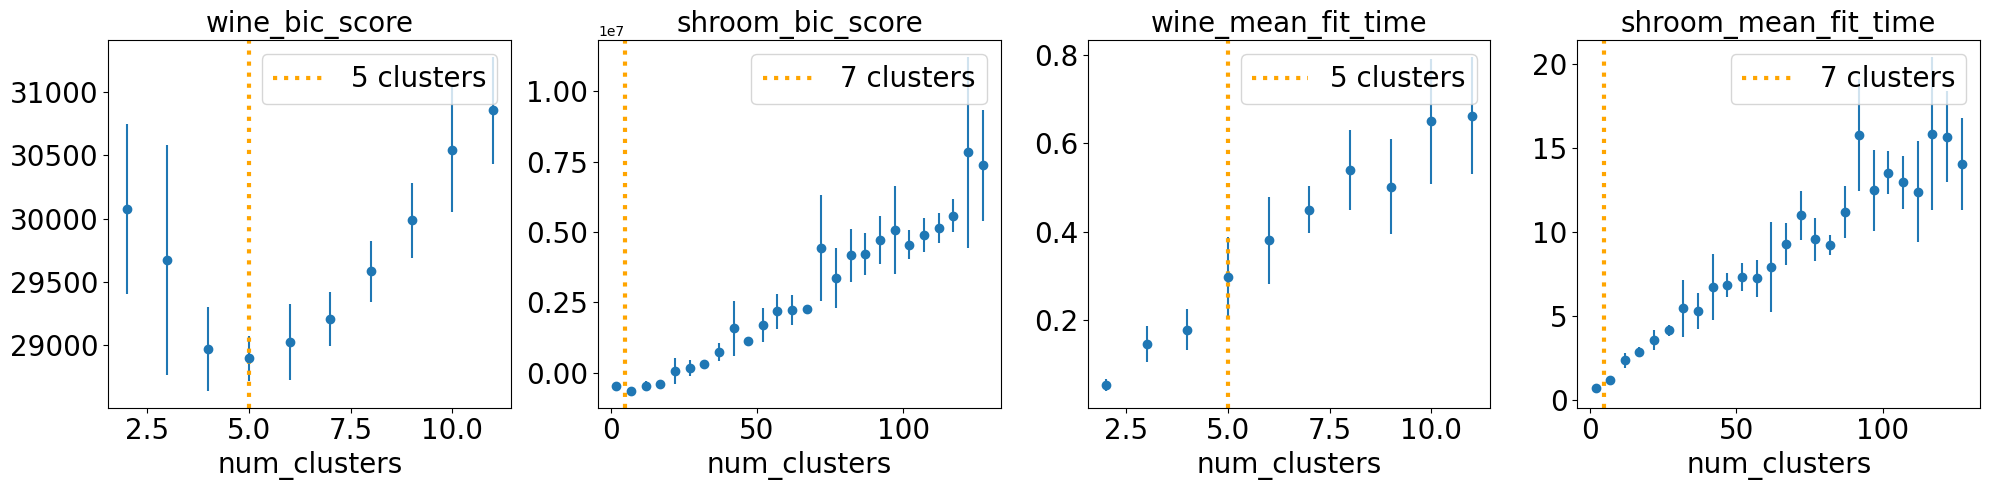

In [182]:
# BIC score for wine
fig, axs = plt.subplots(1,4, figsize=(20,5))
axs= axs.flatten()
x_data = df_em_wine['n_components']
y_mean = df_em_wine['bic_score']
y_std = df_em_wine['std_bic_score']
plot_bic_curve(x_data=x_data, y_mean=y_mean, y_std=y_std,
                axs=axs[0], name='wine_bic_score')

y_mean = df_em_wine['mean_fit_time']
y_std = df_em_wine['std_fit_time']
plot_bic_curve(x_data=x_data, y_mean=y_mean, y_std=y_std,
                axs=axs[2], name='wine_mean_fit_time')

x_data = df_em_shroom['n_components']
y_mean = df_em_shroom['mean_fit_time']
y_std = df_em_shroom['std_fit_time']
plot_bic_curve(x_data=x_data, y_mean=y_mean, y_std=y_std,
                axs=axs[3], name='shroom_mean_fit_time')

y_mean = df_em_shroom['bic_score']
y_std = df_em_shroom['std_bic_score']
plot_bic_curve(x_data=x_data, y_mean=y_mean, y_std=y_std,
                axs=axs[1], name='shroom_bic_score')


axs[0].axvline(x=s_em_cluster_wine.iloc[0,1],color='orange',
                        linestyle=':', label='5 clusters', lw=3)

axs[1].axvline(x=s_em_cluster_wine.iloc[0,1],color='orange',
                        linestyle=':', label='7 clusters', lw=3)

axs[2].axvline(x=s_em_cluster_wine.iloc[0,1],color='orange',
                        linestyle=':', label='5 clusters', lw=3)

axs[3].axvline(x=s_em_cluster_wine.iloc[0,1],color='orange',
                        linestyle=':', label='7 clusters', lw=3)

axs[0].legend(fontsize=20)
axs[1].legend(fontsize=20)
axs[2].legend(fontsize=20)
axs[3].legend(fontsize=20)
plt.tight_layout()
plt.show()

## Dimension Reduction

In [ ]:
df_ica_wine= pd.read_csv(join(DATA_FOLDER,'df_ica_wine.csv'))
s_ica_cluster_wine= pd.read_csv(join(DATA_FOLDER,'s_ica_cluster_wine.csv'))
x_ica_wine= pd.read_csv(join(DATA_FOLDER,'x_ica_wine.csv'))

In [380]:
df_ica_wine.head(2)

,Unnamed: 0,num_components,mean_kurtosis,std_kurtosis
0,0,2,1.066629,1.319314
1,1,3,1.746970,2.086197


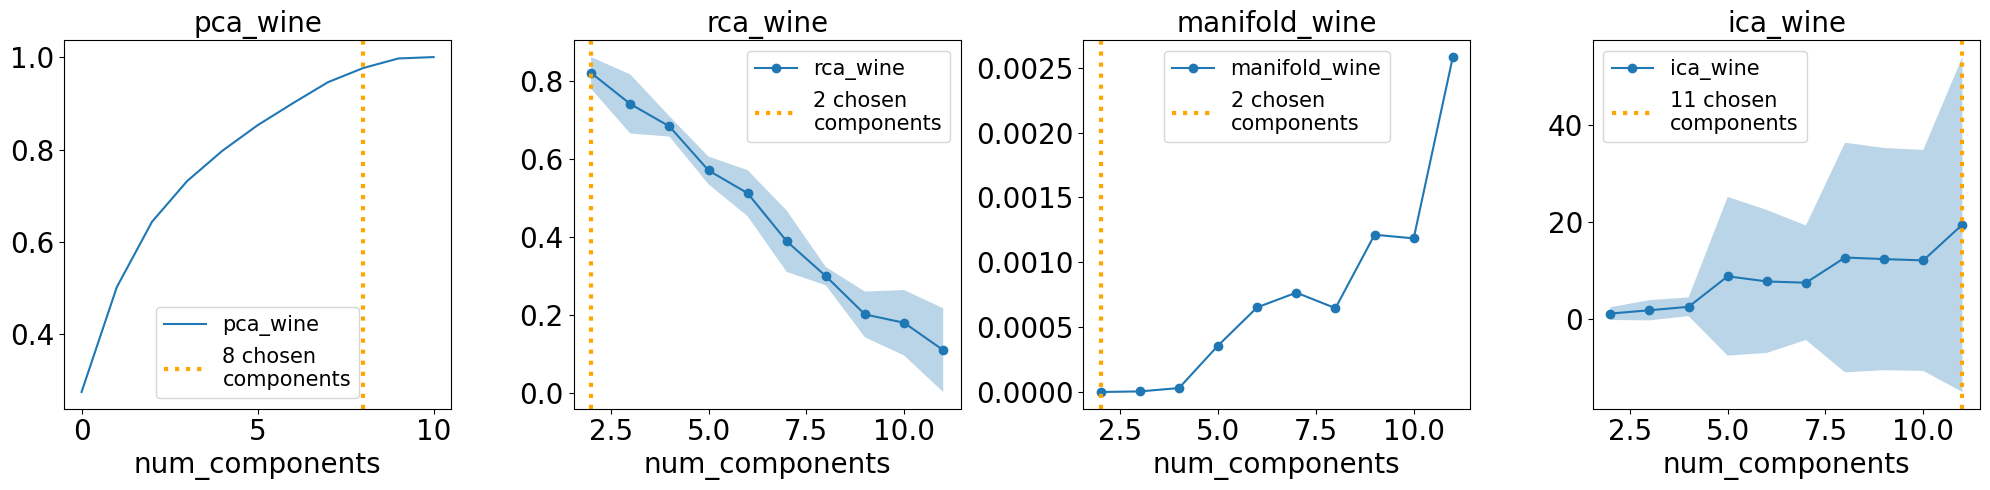

In [382]:
# wine DR
fig, axs = plt.subplots(1,4, figsize=(20,5))
axs =axs.flatten()

x_data = df_pca_wine.index
y_mean = df_pca_wine['0']

plot_rca_curve(x_data=x_data, y_mean=y_mean, y_std=y_std,
                axs=axs[0], name='pca_wine', take_mean=False,
                selected_components=s_pca_cluster_wine.iloc[0,-1])

x_data = df_rca_wine['num_components']
y_mean = df_rca_wine['mean_recon_error']
y_std =df_rca_wine['std_recon_error']

plot_rca_curve(x_data=x_data, y_mean=y_mean, y_std=y_std,
                axs=axs[1], name='rca_wine', take_mean=True,
                 selected_components=s_rca_cluster_wine.iloc[0,-1] )

x_data = df_man_wine['num_components']
y_mean = df_man_wine['mean_recon_error']
y_std =df_man_wine['std_recon_error']

plot_rca_curve(x_data=x_data, y_mean=y_mean, y_std=y_std,
                axs=axs[2], name='manifold_wine', take_mean=True,
                  selected_components=s_man_cluster_wine.iloc[0,-1])

x_data = df_ica_wine['num_components']
y_mean = df_ica_wine['mean_kurtosis']
y_std =df_ica_wine['std_kurtosis']

plot_rca_curve(x_data=x_data, y_mean=y_mean, y_std=y_std,
                axs=axs[3], name='ica_wine', take_mean=True,
                  selected_components=s_ica_cluster_wine.iloc[0,-1])

plt.tight_layout()
plt.show()

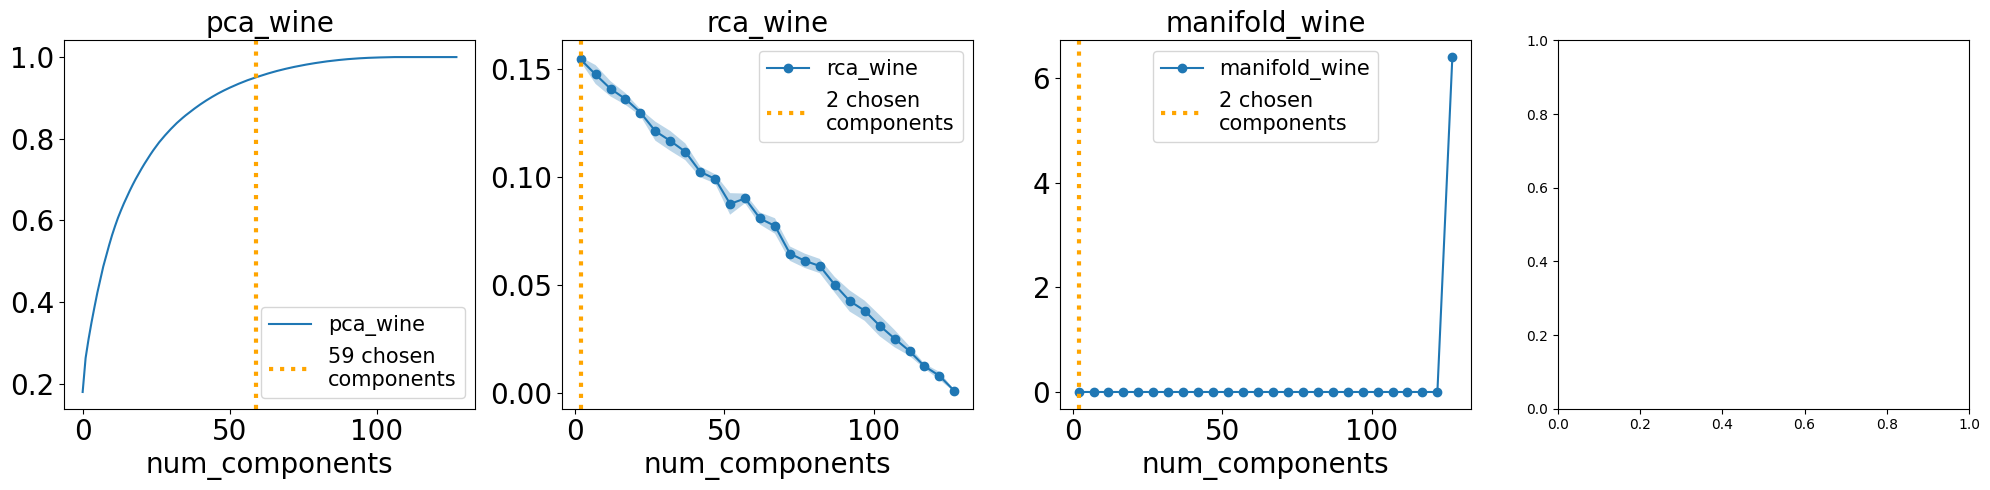

In [374]:
# wine DR
fig, axs = plt.subplots(1,4, figsize=(20,5))
axs =axs.flatten()

x_data = df_pca_shroom.index
y_mean = df_pca_shroom['0']

plot_rca_curve(x_data=x_data, y_mean=y_mean, y_std=y_std,
                axs=axs[0], name='pca_wine', take_mean=False,
                selected_components=s_pca_cluster_shroom.iloc[0,-1])

x_data = df_rca_shroom['num_components']
y_mean = df_rca_shroom['mean_recon_error']
y_std =df_rca_shroom['std_recon_error']

plot_rca_curve(x_data=x_data, y_mean=y_mean, y_std=y_std,
                axs=axs[1], name='rca_wine', take_mean=True,
                 selected_components=s_rca_cluster_shroom.iloc[0,-1] )

x_data = df_man_shroom['num_components']
y_mean = df_man_shroom['mean_recon_error']
y_std =df_man_shroom['std_recon_error']

plot_rca_curve(x_data=x_data, y_mean=y_mean, y_std=y_std,
                axs=axs[2], name='manifold_wine', take_mean=True,
                  selected_components=s_man_cluster_shroom.iloc[0,-1])


x_data = df_ica_shroom['num_components']
y_mean = df_ica_shroom['mean_kurtosis']
y_std =df_ica_shroom['std_kurtosis']

plot_rca_curve(x_data=x_data, y_mean=y_mean, y_std=y_std,
                axs=axs[3], name='ica_wine', take_mean=True,
                  selected_components=s_ica_cluster_shroom.iloc[0,-1])

plt.tight_layout()
plt.show()

## Clustering on Dimension Reduced Data

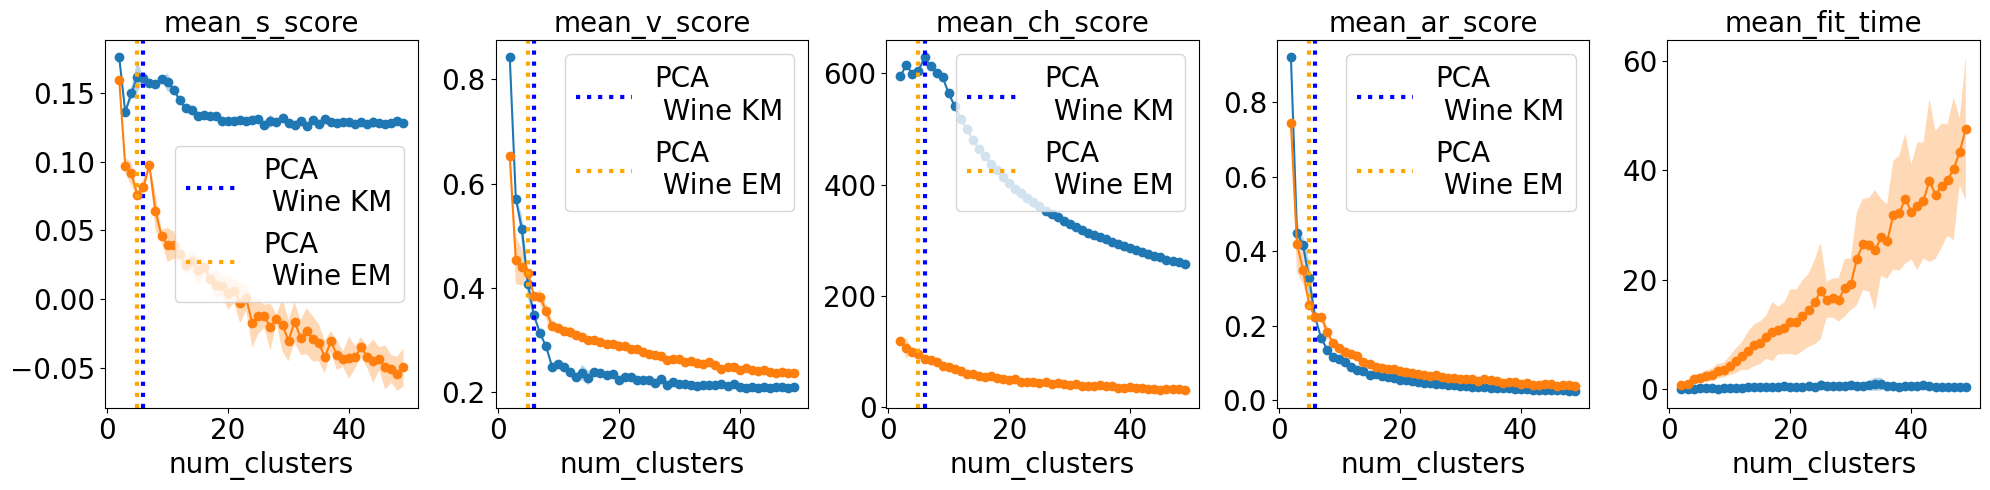

In [358]:
## clustering results pca
fig, axs = plt.subplots(nrows=1,ncols=5, figsize=(20,5))
axs = axs.flatten()
score_lst = ['s', 'v', 'ch', 'ar']
x_data = df_km_pca_wine['num_clusters']
count = 0
for name in score_lst:
    col_name = f'mean_{name}_score'
    std_name = f'std_{name}_score'

    # kmeans plot
    y_mean = df_km_pca_wine[col_name]
    y_std = df_km_pca_wine[std_name]
    plot_dr_clust_curve(x_data=x_data, y_mean=y_mean,
                         y_std=y_std, axs=axs[count], name=col_name, 
                         label='PCA\n Wine KM',
                         selected_components=s_km_pca_cluster_wine.iloc[0,-1])
    axs[count].axvline(x=s_km_pca_cluster_wine.iloc[0,-1], color='blue',
                    linestyle=':', label='PCA\n Wine KM', lw=3)
    
    # EM plot
    y_mean = df_em_score_pca_wine[col_name]
    y_std = df_em_score_pca_wine[std_name]
    plot_dr_clust_curve(x_data=x_data, y_mean=y_mean,
                         y_std=y_std, axs=axs[count], name=col_name, 
                         label='PCA\n Wine EM',
                         selected_components=s_em_cluster_pca_wine.iloc[0,-1])
    axs[count].axvline(x=s_em_cluster_pca_wine.iloc[0,-1], color='orange',
                linestyle=':', label='PCA\n Wine EM', lw=3)
    
    axs[count].legend(fontsize=20)
    # increment index counter for axes array
    count=count+1

# plot fit time for km
y_mean = df_km_pca_wine['mean_fit_time']
y_std = df_km_pca_wine['std_fit_time']
plot_curve(x_data=x_data, y_mean=y_mean, y_std=y_std, axs=axs[-1], name='mean_fit_time')

# plot fit time for em
y_mean = df_em_score_pca_wine['mean_fit_time']
y_std = df_em_score_pca_wine['std_fit_time']
plot_curve(x_data=x_data, y_mean=y_mean, y_std=y_std, axs=axs[-1], name='mean_fit_time')

# tighten layer for figure clarity
plt.tight_layout()
plt.show()

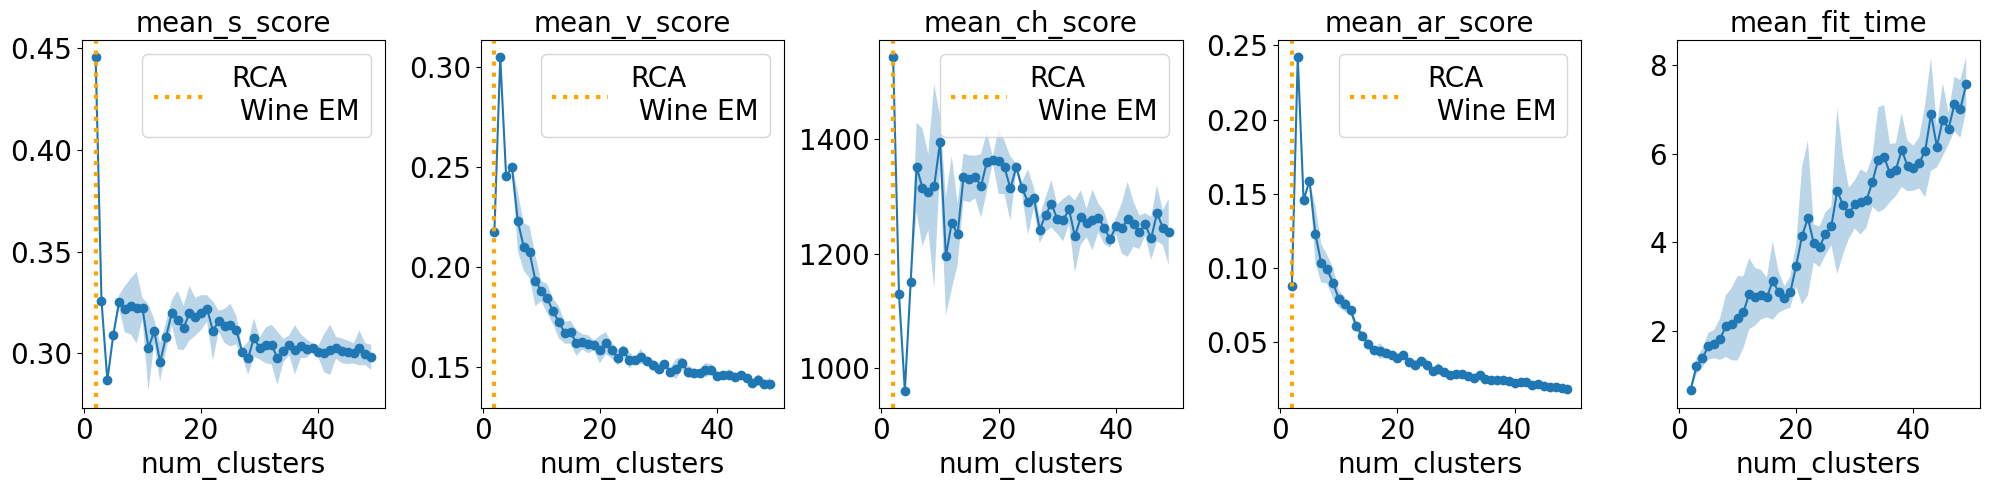

In [359]:
## clustering results pca
fig, axs = plt.subplots(nrows=1,ncols=5, figsize=(20,5))
axs = axs.flatten()
score_lst = ['s', 'v', 'ch', 'ar']
x_data = df_em_score_rca_wine['num_clusters']
count = 0
for name in score_lst:
    col_name = f'mean_{name}_score'
    std_name = f'std_{name}_score'

    # EM plot
    y_mean = df_em_score_rca_wine[col_name]
    y_std = df_em_score_rca_wine[std_name]
    plot_dr_clust_curve(x_data=x_data, y_mean=y_mean,
                         y_std=y_std, axs=axs[count], name=col_name, 
                         label='RCA\n Wine EM',
                         selected_components=s_em_cluster_rca_wine.iloc[0,-1])
    axs[count].axvline(x=s_em_cluster_rca_wine.iloc[0,-1], color='orange',
                linestyle=':', label='RCA\n Wine EM', lw=3)
    
    axs[count].legend(fontsize=20)
    # increment index counter for axes array
    count=count+1

# plot fit time for em
y_mean = df_em_score_rca_wine['mean_fit_time']
y_std = df_em_score_rca_wine['std_fit_time']
plot_curve(x_data=x_data, y_mean=y_mean, y_std=y_std, axs=axs[-1], name='mean_fit_time')

# tighten layer for figure clarity
plt.tight_layout()
plt.show()

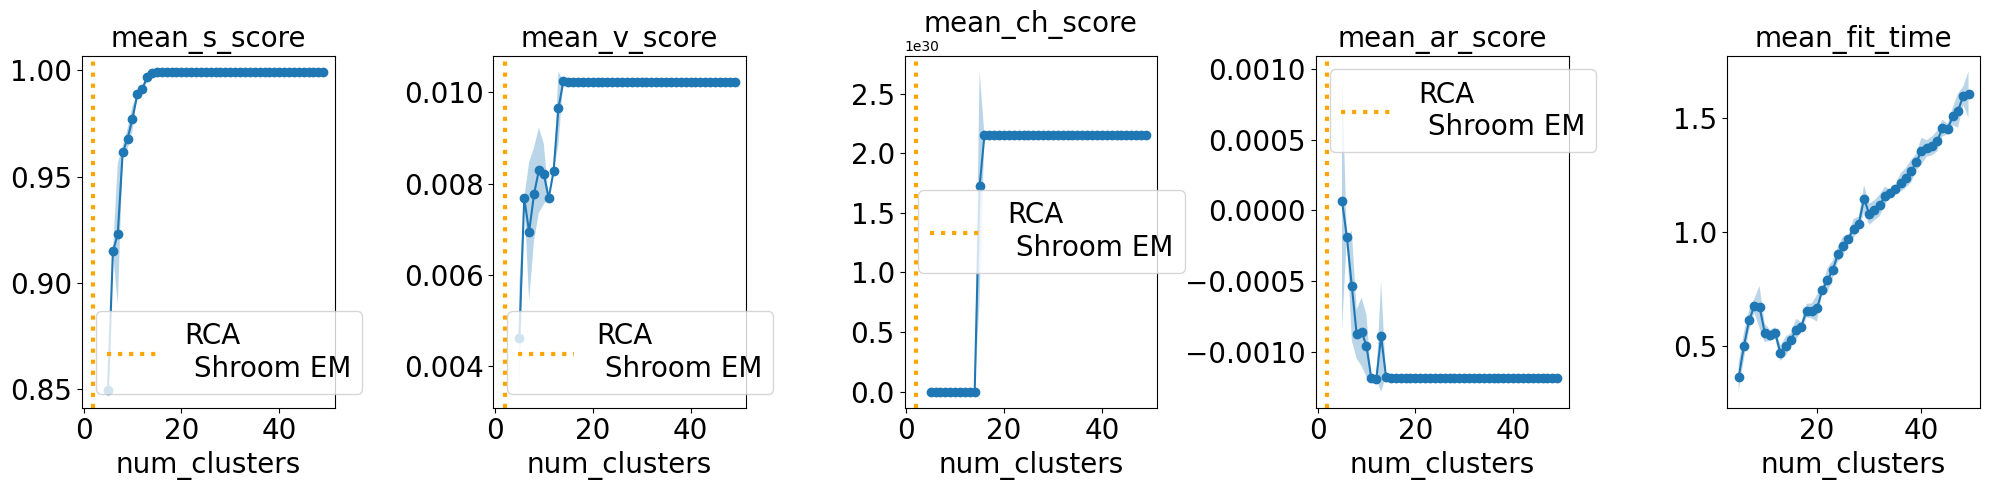

In [360]:
## clustering results pca
fig, axs = plt.subplots(nrows=1,ncols=5, figsize=(20,5))
axs = axs.flatten()
score_lst = ['s', 'v', 'ch', 'ar']
x_data = df_em_score_rca_shroom['num_clusters']
count = 0
for name in score_lst:
    col_name = f'mean_{name}_score'
    std_name = f'std_{name}_score'

    # EM plot
    y_mean = df_em_score_rca_shroom[col_name]
    y_std = df_em_score_rca_shroom[std_name]
    plot_dr_clust_curve(x_data=x_data, y_mean=y_mean,
                         y_std=y_std, axs=axs[count], name=col_name, 
                         label='RCA\n Shroom EM',
                         selected_components=s_em_cluster_rca_shroom.iloc[0,-1])
    axs[count].axvline(x=s_em_cluster_rca_shroom.iloc[0,-1], color='orange',
                linestyle=':', label='RCA\n Shroom EM', lw=3)
    
    axs[count].legend(fontsize=20)
    # increment index counter for axes array
    count=count+1

# plot fit time for em
y_mean = df_em_score_rca_shroom['mean_fit_time']
y_std = df_em_score_rca_shroom['std_fit_time']
plot_curve(x_data=x_data, y_mean=y_mean, y_std=y_std, axs=axs[-1], name='mean_fit_time')

# tighten layer for figure clarity
plt.tight_layout()
plt.show()

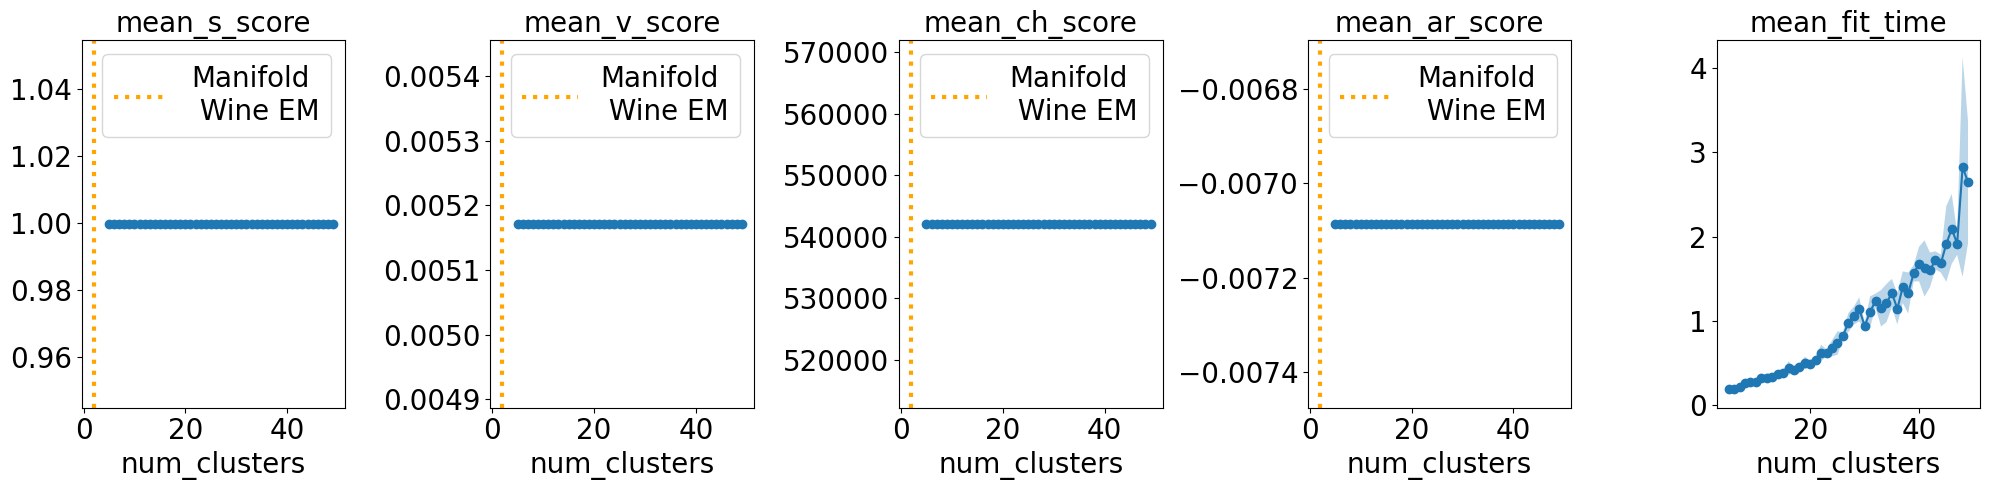

In [361]:
## clustering results pca
fig, axs = plt.subplots(nrows=1,ncols=5, figsize=(20,5))
axs = axs.flatten()
score_lst = ['s', 'v', 'ch', 'ar']
x_data = df_em_score_man_wine['num_clusters']
count = 0
for name in score_lst:
    col_name = f'mean_{name}_score'
    std_name = f'std_{name}_score'

    # EM plot
    y_mean = df_em_score_man_wine[col_name]
    y_std = df_em_score_man_wine[std_name]
    plot_dr_clust_curve(x_data=x_data, y_mean=y_mean,
                         y_std=y_std, axs=axs[count], name=col_name, 
                         label='Manifold\n Wine EM',
                         selected_components=s_em_cluster_man_wine.iloc[0,-1])
    
    axs[count].axvline(x=s_em_cluster_man_wine.iloc[0,-1], color='orange',
                linestyle=':', label='Manifold\n Wine EM', lw=3)
    
    axs[count].legend(fontsize=20)

    # increment index counter for axes array
    count=count+1

# plot fit time for em
y_mean = df_em_score_man_wine['mean_fit_time']
y_std = df_em_score_man_wine['std_fit_time']
plot_curve(x_data=x_data, y_mean=y_mean, y_std=y_std, axs=axs[-1], name='mean_fit_time')

# tighten layer for figure clarity
plt.tight_layout()
plt.show()

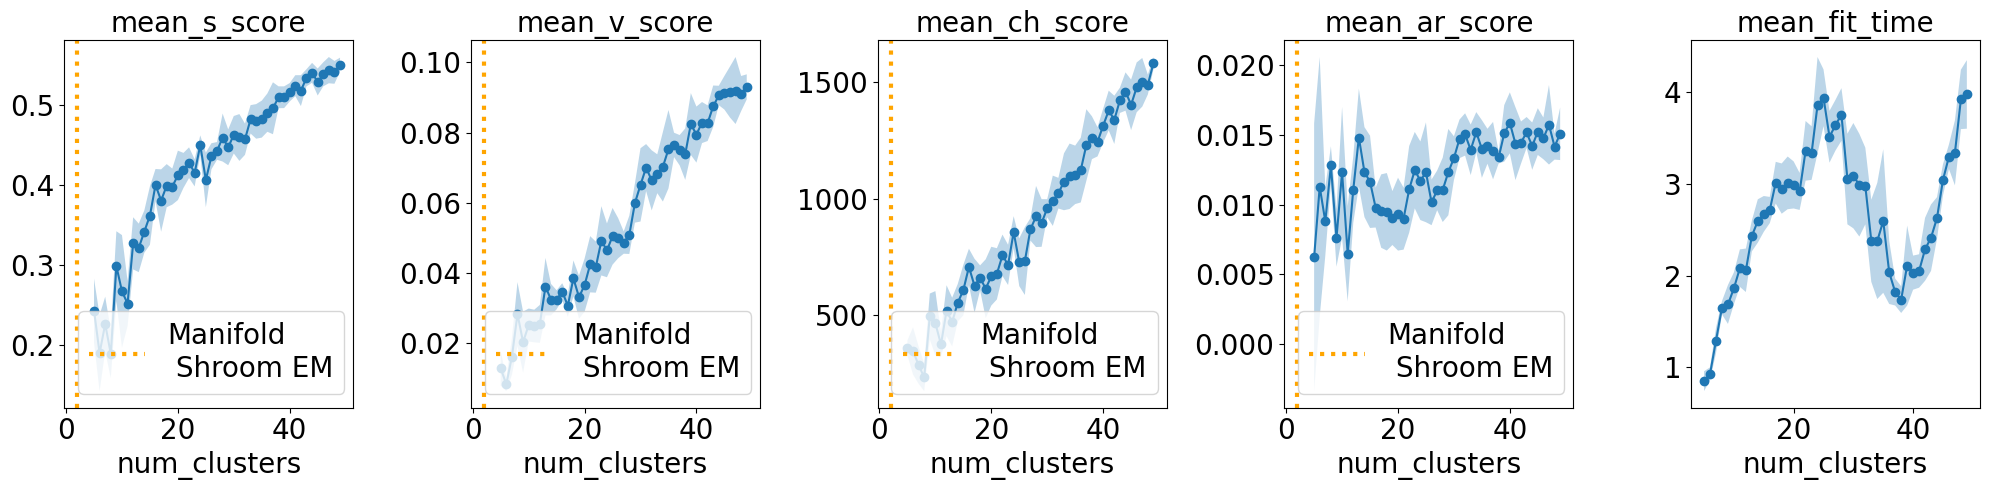

In [362]:
## clustering results pca
fig, axs = plt.subplots(nrows=1,ncols=5, figsize=(20,5))
axs = axs.flatten()
score_lst = ['s', 'v', 'ch', 'ar']
x_data = df_em_score_man_shroom['num_clusters']
count = 0
for name in score_lst:
    col_name = f'mean_{name}_score'
    std_name = f'std_{name}_score'

    # EM plot
    y_mean = df_em_score_man_shroom[col_name]
    y_std = df_em_score_man_shroom[std_name]
    plot_dr_clust_curve(x_data=x_data, y_mean=y_mean,
                         y_std=y_std, axs=axs[count], name=col_name, 
                         label='Manifold \n Shroom EM',
                         selected_components=s_em_cluster_man_shroom.iloc[0,-1])
    
    axs[count].axvline(x=s_em_cluster_man_shroom.iloc[0,-1], color='orange',
                linestyle=':', label='Manifold\n Shroom EM', lw=3)
    
    axs[count].legend(fontsize=20)

    # increment index counter for axes array
    count=count+1

# plot fit time for em
y_mean = df_em_score_man_shroom['mean_fit_time']
y_std = df_em_score_man_shroom['std_fit_time']
plot_curve(x_data=x_data, y_mean=y_mean, y_std=y_std, axs=axs[-1], name='mean_fit_time')

# tighten layer for figure clarity
plt.tight_layout()
plt.show()

In [ ]:
## Plot BIC Scores Wine

## clustering results pca
fig, axs = plt.subplots(nrows=1,ncols=5, figsize=(20,5))
axs = axs.flatten()
em_bic_df_lst = []
x_data = df_em_score_man_shroom['num_clusters']
count = 0
for name in score_lst:
    col_name = f'mean_{name}_score'
    std_name = f'std_{name}_score'

    # EM plot
    y_mean = df_em_score_man_shroom[col_name]
    y_std = df_em_score_man_shroom[std_name]
    plot_dr_clust_curve(x_data=x_data, y_mean=y_mean,
                         y_std=y_std, axs=axs[count], name=col_name, 
                         label='Manifold \n Shroom EM',
                         selected_components=s_em_cluster_man_shroom.iloc[0,-1])
    
    axs[count].axvline(x=s_em_cluster_man_shroom.iloc[0,-1], color='orange',
                linestyle=':', label='Manifold\n Shroom EM', lw=3)
    
    axs[count].legend(fontsize=20)

    # increment index counter for axes array
    count=count+1

# plot fit time for em
y_mean = df_em_score_man_shroom['mean_fit_time']
y_std = df_em_score_man_shroom['std_fit_time']
plot_curve(x_data=x_data, y_mean=y_mean, y_std=y_std, axs=axs[-1], name='mean_fit_time')

# tighten layer for figure clarity
plt.tight_layout()
plt.show()